<a href="https://colab.research.google.com/github/Nicky-Ghai/Face-Emotion-Recognition-/blob/main/Individual_file(NICKY_GHAI)_Face_Emotion_Recognition_Capstone_Project_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** 

 **Face Emotion Recognition**

**NICKY GHAI-Individual File**

# **Project Indroduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import cv2
import os

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

# Directly Using DeepFace

In [ ]:
# Installing DeepFace
pip install deepface

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 2.3MB 12.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=12f2060ffeeec1093aa117dea3e3661cf336a10a1a515cf32e48cdda635da1e7
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
# Upload A file from local Drive
from google.colab import files
uploaded = files.upload()

Saving portrait-young-angry-man-260nw-157245086.jpg to portrait-young-angry-man-260nw-157245086.jpg


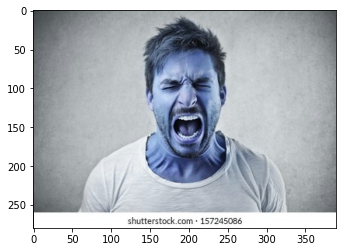

In [ ]:
# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread("portrait-young-angry-man-260nw-157245086.jpg")
plt.imshow(img_array)

In [ ]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "portrait-young-angry-man-260nw-157245086.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 27.2MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:12, 42.5MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:14, 38.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:04, 125MB/s]
Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

31  years old  middle eastern   happy   Man


##**Transfer Learning Using CPU**

### **Reading all the images and converting them to array**

In [ ]:
Datadirectory="Training1/"
Datadirectory_test="Testing/"
Classes=["0","1","2","3","4","5","6"]

In [ ]:
#Read all Training images
training_Data=[]

def creat_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
creat_training_data()
print(len(training_Data))

import random

random.shuffle(training_Data)

X=[]
y=[]
# Converting to array and dimension for transfer Learning
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

12436


In [ ]:
#Read all Testing images
testing_Data=[]

def creat_testing_data():
    for category in Classes:
        path=os.path.join(Datadirectory_test,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                testing_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
creat_testing_data()
print(len(testing_Data))

import random

random.shuffle(testing_Data)

X_test=[]
y_test=[]
# Converting to array and dimension for transfer Learning
for features,label in testing_Data:
    X_test.append(features)
    y_test.append(label)
    
X_test=np.array(X_test).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

7178


In [ ]:
# normalize the data
X= X/255.0;
Y=np.array(y)

In [ ]:
# normalize the data
X_test= X_test/255.0;
Y_test=np.array(y_test)

## **Deep Learning Model For Training-Transfer Learning**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Using Pretrained MobileNetVerion2
model=tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## **Transfer Learning**

In [ ]:
base_input=model.layers[0].input ## Input

In [ ]:
base_output = model.layers[-2].output ## Output

In [ ]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [ ]:
final_output=layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_output=layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation ('relu')(final_output)
final_output= layers.Dense(7, activation='softmax')(final_output) ## set classes of 7 , the original has 1000 classes

In [ ]:
final_output ## output

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 7) dtype=float32>

In [ ]:
new_model=keras.Model(inputs=base_input, outputs= final_output)

In [ ]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
# compile
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
#Training
new_model.fit(X,Y,epochs=25)

Epoch 1/25
389/389 [==============================] - 3352s 9s/step - loss: 1.4279 - accuracy: 0.4546
Epoch 2/25
389/389 [==============================] - 3591s 9s/step - loss: 1.2180 - accuracy: 0.5337
Epoch 3/25
389/389 [==============================] - 3467s 9s/step - loss: 1.1236 - accuracy: 0.5733
Epoch 4/25
389/389 [==============================] - 3618s 9s/step - loss: 1.0492 - accuracy: 0.6070
Epoch 5/25
389/389 [==============================] - 4143s 11s/step - loss: 0.9841 - accuracy: 0.6294
Epoch 6/25
389/389 [==============================] - 3938s 10s/step - loss: 0.9024 - accuracy: 0.6603
Epoch 7/25
389/389 [==============================] - 4071s 10s/step - loss: 0.8401 - accuracy: 0.6894
Epoch 8/25
389/389 [==============================] - 2839s 7s/step - loss: 0.7974 - accuracy: 0.7028
Epoch 9/25
389/389 [==============================] - 2710s 7s/step - loss: 0.7305 - accuracy: 0.7309
Epoch 10/25
389/389 [==============================] - 2960s 8s/step - loss: 0.

In [ ]:
# Save Model
new_model.save('Final_model_all_data.h5')

In [ ]:
#Load Model
new_model=tf.keras.models.load_model('Final_model_all_data.h5')

In [ ]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
# Show scores on X_test,Y_test
scores = new_model.evaluate(X_test,Y_test)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

225/225 [==============================] - 20s 87ms/step - loss: 11.5124 - accuracy: 0.0000e+00
Loss: 11.512420654296875
Accuracy: 0.0


In [ ]:
frame=cv2.imread("disgust3.jpg")

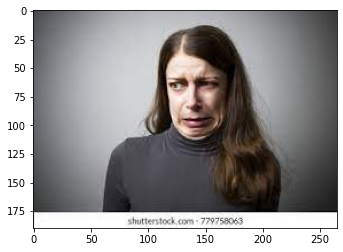

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
# Face detection algorithm

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(190, 265)

In [ ]:
# Dectection and putting rectangle and cropping on the face
faces= faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w,y+h+12),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi= roi_color[ey:ey+eh,ex:ex+ew]

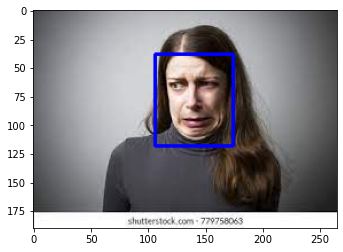

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

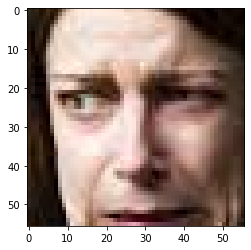

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
#predicting the image emotion
Predictions=new_model.predict(final_image)

In [ ]:
np.argmax(Predictions) ### 3 = Happy

3